# Visualizing statistical relationships

Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables. Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.

We will discuss three seaborn functions in this tutorial. The one we will use most is **```relplot()```**. This is a figure-level function for visualizing statistical relationships using two common approaches: scatter plots and line plots. **```relplot()```** combines a **```FacetGrid```** with one of two axes-level functions:

- **```scatterplot()```** (with ```kind="scatter"```; the default)

- **```lineplot()```** (with ```kind="line"```)

As we will see, these functions can be quite illuminating because they use simple and easily-understood representations of data that can nevertheless represent complex dataset structures. They can do so because they plot two-dimensional graphics that can be enhanced by mapping up to three additional variables using the semantics of hue, size, and style.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

## Relating variables with scatter plots

The scatter plot is a mainstay of statistical visualization. It depicts the joint distribution of two variables using a cloud of points, where each point represents an observation in the dataset. This depiction allows the eye to infer a substantial amount of information about whether there is any meaningful relationship between them.

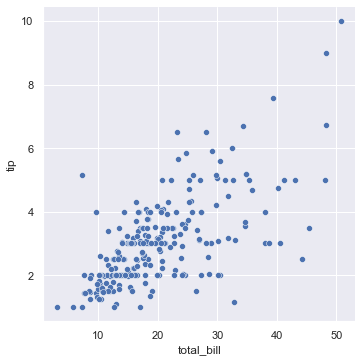

In [2]:
tips = sns.load_dataset("tips")
sns.relplot(data=tips, x="total_bill", y="tip")

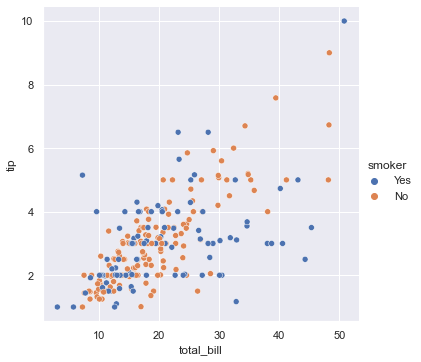

In [3]:
# Add hue
sns.relplot(data=tips, x="total_bill", y="tip", hue="smoker")

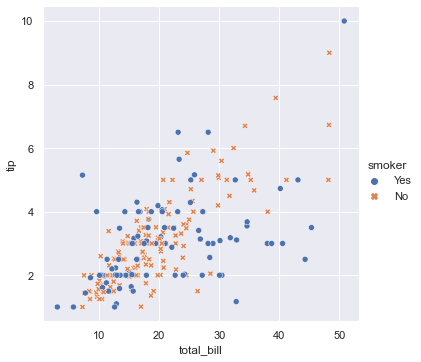

In [4]:
# Add style
sns.relplot(data=tips, x="total_bill", y="tip", hue="smoker", style="smoker")


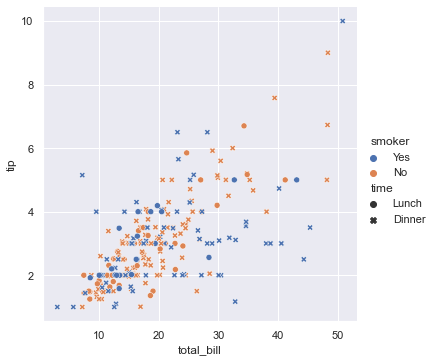

In [5]:
# Different hue and style
sns.relplot(data=tips, x="total_bill", y="tip", hue="smoker", style="time",)

In the examples above, the hue semantic was categorical, so the default qualitative palette was applied. If the hue semantic is numeric (specifically, if it can be cast to float), the default coloring switches to a sequential palette:

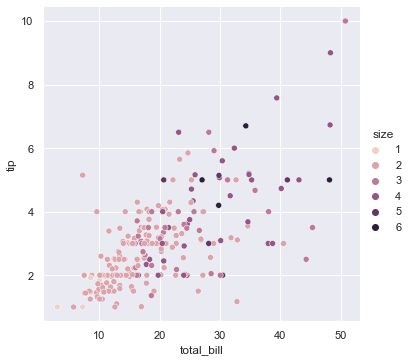

In [6]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="size")

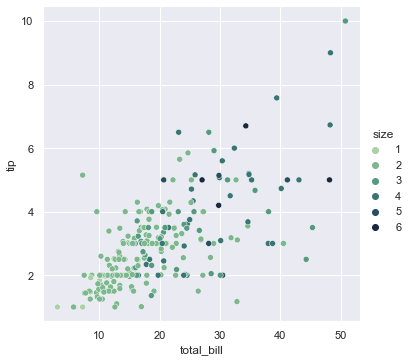

In [7]:
#  customize color palette
sns.relplot(data=tips, x="total_bill", y="tip", hue="size", palette="ch:r=-.5,l=.75")

## Emphasizing continuity with line plots

Scatter plots are highly effective, but there is no universally optimal type of visualisation. Instead, the visual representation should be adapted for the specifics of the dataset and to the question you are trying to answer with the plot.

With some datasets, you may want to understand changes in one variable as a function of time, or a similarly continuous variable. In this situation, a good choice is to draw a line plot. In seaborn, this can be accomplished by the **```lineplot()```** function, either directly or with **```relplot()```** by setting **```kind="line"```**:

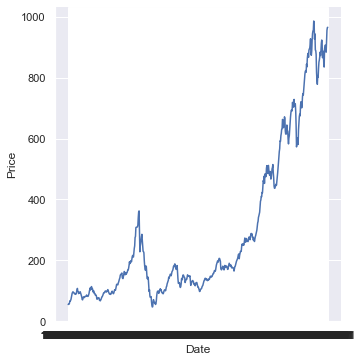

In [8]:
dowjones = sns.load_dataset("dowjones")
sns.relplot(data=dowjones, x="Date", y="Price", kind="line")

### Aggregation and representing uncertainty

More complex datasets will have multiple measurements for the same value of the ```x``` variable. The default behavior in seaborn is to aggregate the multiple measurements at each ```x``` value by plotting the mean and the 95% confidence interval around the mean:

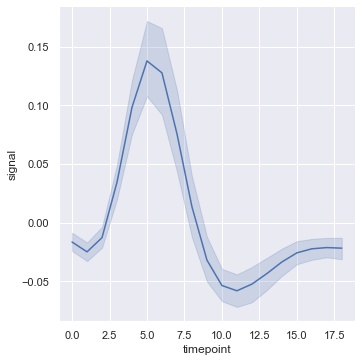

In [9]:
fmri =sns.load_dataset("fmri")
sns.relplot(data=fmri, x="timepoint", y="signal", kind="line")

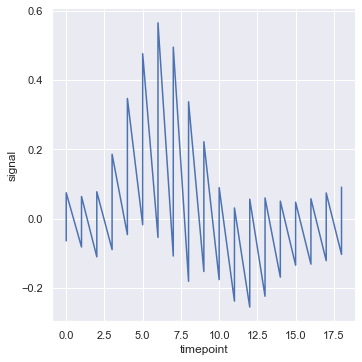

In [10]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", estimator=None,
)

### Plotting subsets of data with semantic mappings

The **```lineplot()```** function has the same flexibility as **```scatterplot()```**: it can show up to three additional variables by modifying the hue, size, and style of the plot elements. It does so using the same API as **```scatterplot()```**, meaning that we don’t need to stop and think about the parameters that control the look of lines vs. points in matplotlib.

Using semantics in **```lineplot()```** will also determine how the data get aggregated. For example, adding a hue semantic with two levels splits the plot into two lines and error bands, coloring each to indicate which subset of the data they correspond to.

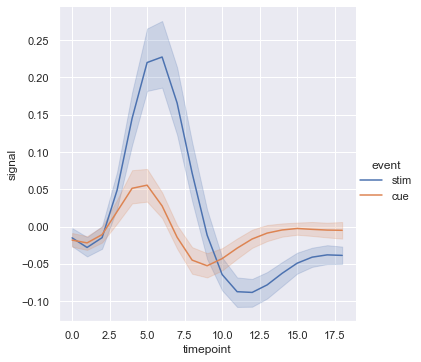

In [11]:
sns.relplot(data=fmri, kind="line", x="timepoint", y="signal", hue="event")

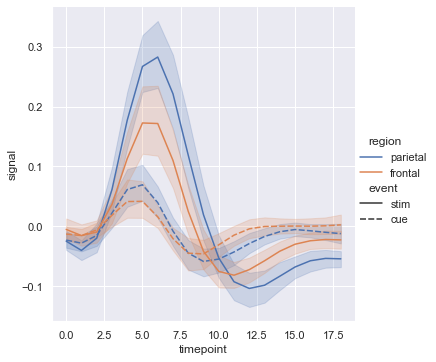

In [12]:
sns.relplot(data=fmri, kind="line", x="timepoint", y="signal", hue="region", style="event")

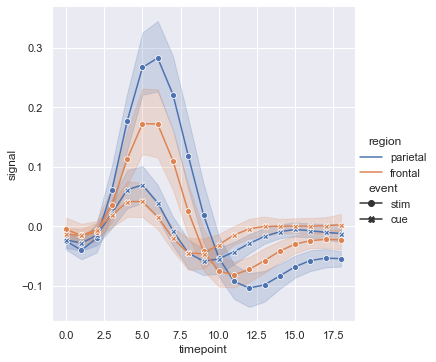

In [13]:
sns.relplot(data=fmri, kind="line", x="timepoint", y="signal",
            hue="region", style="event", dashes=False, markers=True)

When you are working with repeated measures data (that is, you have units that were sampled multiple times), you can also plot each sampling unit separately without distinguishing them through semantics. This avoids cluttering the legend:

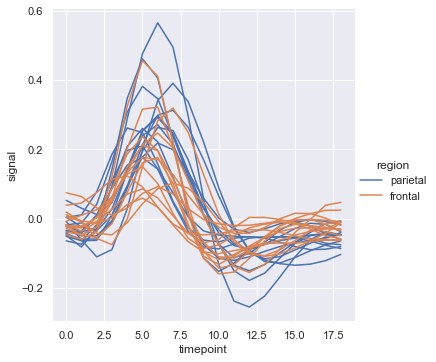

In [14]:
sns.relplot(
    data=fmri.query("event == 'stim'"), kind="line",
    x="timepoint", y="signal", hue="region",
    units="subject", estimator=None,
)

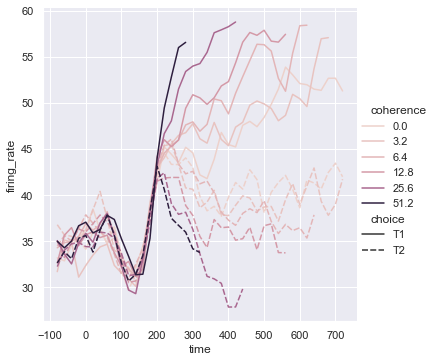

In [15]:
dots = sns.load_dataset("dots").query("align == 'dots'")
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    hue="coherence", style="choice",
)

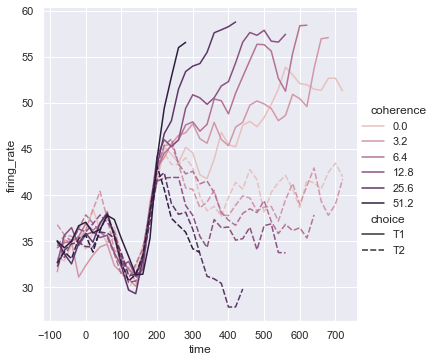

In [16]:
palette = sns.cubehelix_palette(light=.8, n_colors=6)
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    hue="coherence", style="choice", palette=palette,
)

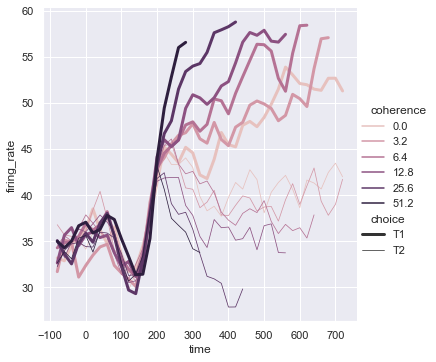

In [17]:
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    hue="coherence", size="choice", palette=palette,
)

### Controlling sorting and orientation

Because **```lineplot()```** assumes that you are most often trying to draw ```y``` as a function of ``x``, the default behavior is to sort the data by the ``x`` values before plotting. However, this can be disabled:

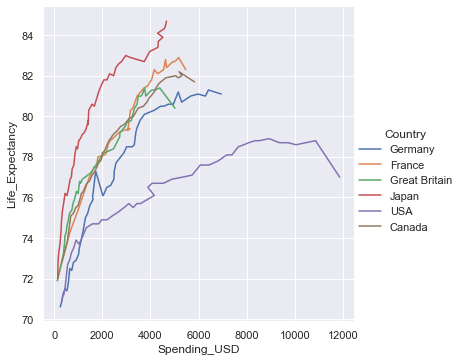

In [18]:
healthexp = sns.load_dataset("healthexp").sort_values("Year")
sns.relplot(
    data=healthexp, kind="line",
    x="Spending_USD", y="Life_Expectancy", hue="Country",
    sort=False
)

## Showing multiple relationships with facets

We’ve emphasized in this tutorial that, while these functions can show several semantic variables at once, it’s not always effective to do so. But what about when you do want to understand how a relationship between two variables depends on more than one other variable?

The best approach may be to make more than one plot. Because **```relplot()```** is based on the **```FacetGrid```**, this is easy to do. To show the influence of an additional variable, instead of assigning it to one of the semantic roles in the plot, use it to “facet” the visualization. This means that you make multiple axes and plot subsets of the data on each of them:

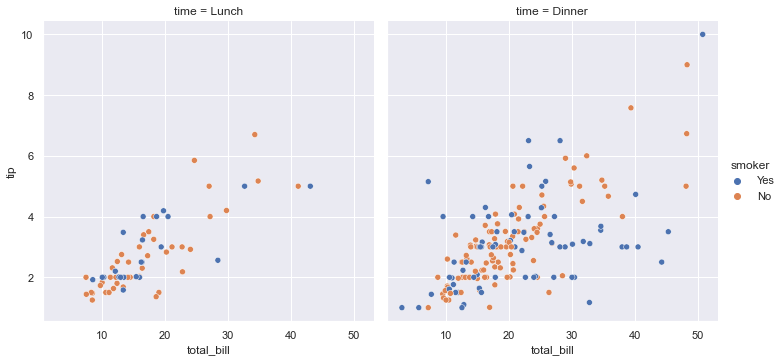

In [19]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="smoker", col="time")

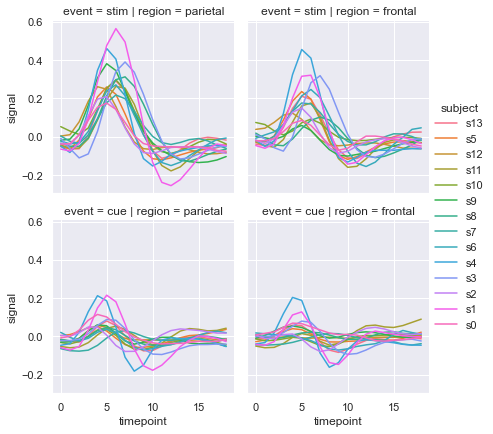

In [20]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="subject",
    col="region", row="event", height=3
)

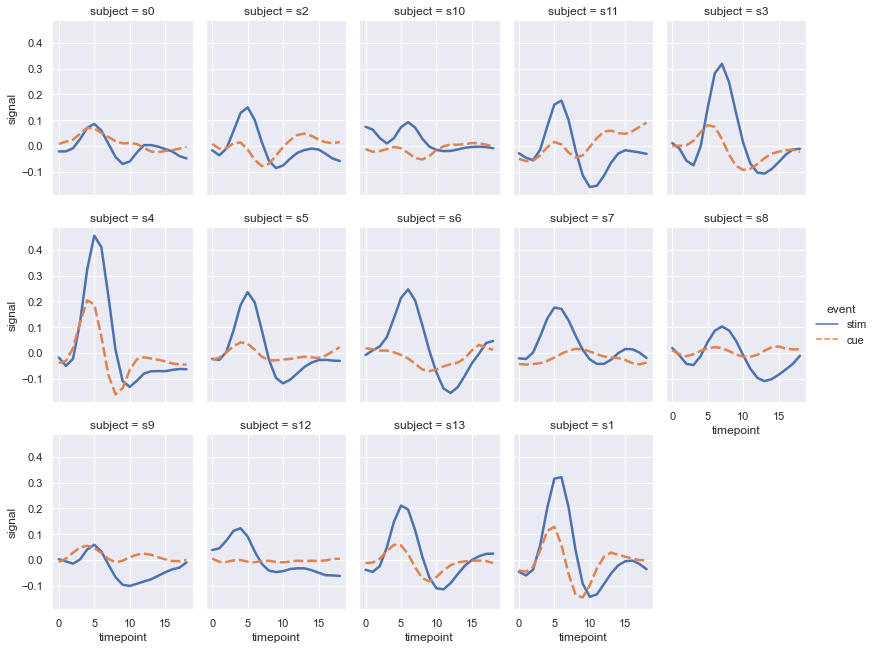

In [21]:
sns.relplot(
    data=fmri.query("region == 'frontal'"), kind="line",
    x="timepoint", y="signal", hue="event", style="event",
    col="subject", col_wrap=5,
    height=3, aspect=.75, linewidth=2.5,
)